<h2>Table of Contents</h2>
<ul>
    <li><a href="#ref1">Model Evaluation </a></li>
    <li><a href="#ref2">Over-fitting, Under-fitting and Model Selection </a></li>
    <li><a href="#ref3">Ridge Regression </a></li>
    <li><a href="#ref4">Grid Search</a></li>
</ul>


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Прочитаем файл в переменную
file = r"C:\Users\admin\Desktop\kc_house_data.csv"
# присвоим его переменной "df". или любой другой понятной переменной  с помощью метода для чтения csv, 
df = pd.read_csv(file)

Во -первых, давайте используем только числовые данные:


In [4]:
df=df._get_numeric_data()
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Библиотеки для графиков:


In [5]:
from ipywidgets import interact, interactive, fixed, interact_manual

<h2>Функции для графиков</h2>


In [6]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Houses')

    plt.show()
    plt.close()

In [7]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 8000000])
    plt.ylabel('Price')
    plt.legend()

<h2 id = "ref1"> Часть 1: Обучение и тестирование </h2>

<p> Важным шагом в тестировании вашей модели является разделение ваших данных на данные обучения и тестирования.Мы поместим целевые данные <b> Цена </b> в отдельный DataFrame <b> y_data </b>: </p>


In [8]:
y_data = df['price']

Удалим этот столбец из дф для исключения мультиколлинерности и присвоим ему имя **x_data**:


In [9]:
x_data=df.drop('price',axis=1)

Теперь мы случайным образом разделяем наши данные на данные обучения и тестирования, используя функцию <b>train_test_split</b>. 


In [10]:
from sklearn.model_selection import train_test_split
# x_train - тренировочные данные из датасета x_data, x_test - тестовые данные x_data, 
# y_train - тренировочные данные из датасета y_data, y_test - тестовые данные y_data
#  размер теста - 10 проц
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)

print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])


number of test samples : 2162
number of training samples: 19451


The <b>test_size</b> Параметр устанавливает долю данных, которые разделены на набор тестирования.В вышеперечисленном набор тестирования составляет 10% от общего набора данных.




<b>Используем функцию "train_test_split" Для разделения набора данных так, чтобы для тестирования использовались 40% образцов данных.

Установим параметр "random_state" равен нулю..</b>
</div>


In [11]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.4, random_state=0) 
print("number of test samples :", x_test1.shape[0])
print("number of training samples:",x_train1.shape[0])


number of test samples : 8646
number of training samples: 12967


Давайте импортируем <b>LinearRegression</b> из модуля <b>linear_model</b>.


In [12]:
from sklearn.linear_model import LinearRegression

Мы создаем объект линейной регрессии:


In [13]:
lre=LinearRegression()

Мы подгоняем модель, используя эту функцию, передавая параметр "sqft_living":


In [14]:
lre.fit(x_train[['sqft_living']], y_train)

LinearRegression()

Давайте рассчитаем R^2 в тестовых данных:


In [15]:
lre.score(x_test[['sqft_living']], y_test)

0.48489043226442785

Мы можем увидеть R^2 немного меньше с использованием тестовых данных по сравнению с учебными данными.


In [16]:
lre.score(x_train[['sqft_living']], y_train)

0.4938445479924307



Найдем R^2 в тестовых данных, используя 40% набора данных для тестирования.



In [17]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.4, random_state=0)
lre.fit(x_train1[['sqft_living']],y_train1)
lre.score(x_test1[['sqft_living']],y_test1)


0.5038132932066877

Иногда у вас нет достаточных данных тестирования;В результате вы можете выполнить перекрестную проверку.Давайте рассмотрим несколько методов, которые вы можете использовать для перекрестной проверки.


<h2>Cross-Validation Score</h2>


Давайте импортируем <b>model_selection</b> из модуля <b>cross_val_score</b>.


In [18]:
from sklearn.model_selection import cross_val_score

Мы вводим объект, функция ("sqft_living"), и целевые данные (y_data). Параметр 'cv' Определяет количество складок.В этом случае это 4. 


In [19]:
Rcross = cross_val_score(lre, x_data[['sqft_living']], y_data, cv=4)

По умолчанию оценка R^2. Каждый элемент в массиве имеет среднее значение R^2 значение для сгиба:


In [20]:
Rcross

array([0.48405393, 0.49342812, 0.4945384 , 0.49661067])

Мы можем рассчитать среднее и стандартное отклонение нашей оценки:


In [21]:
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are 0.49215778141759514 and the standard deviation is 0.004816164814374254


Мы можем использовать отрицательную квадратичную ошибку в качестве оценки, установив параметр «оценка» метрики для 'neg_mean_squared_error'.


In [22]:
-1 * cross_val_score(lre,x_data[['sqft_living']], y_data,cv=4,scoring='neg_mean_squared_error')

array([7.40300278e+10, 6.78275022e+10, 6.31573009e+10, 6.85353219e+10])


<b> 
Рассчитайте средний r^2, используя два сгиба, затем найдите средний r^2 для второго сгиба, используя параметр «жилая площадь»:
</b>
</div>


In [23]:
Rc=cross_val_score(lre,x_data[['sqft_living']], y_data,cv=2)
Rc.mean()


0.4917805129078395

Вы также можете использовать функцию «cross_val_predict» для прогнозирования вывода.

Функция разбивает данные в указанное количество сгиб, с одним из них для тестирования, а другие складки используются для обучения.Во -первых, импортируйте функцию:


In [24]:
from sklearn.model_selection import cross_val_predict

We input the object, the feature <b>"horsepower"</b>, and the target data <b>y_data</b>. The parameter 'cv' determines the number of folds. In this case, it is 4. We can produce an output:


In [25]:
yhat = cross_val_predict(lre,x_data[['sqft_living']], y_data,cv=4)
yhat[0:5]

array([289097.80337707, 676049.91415716, 174960.84983762, 506236.39791554,
       428289.2101325 ])

<h2 id = "ref2"> Часть 2: переосмысление, недостаток и выбор модели </h2>

<p> Оказывается, что данные тестирования, иногда называемые «вне выборки данных», являются гораздо лучшей мерой того, насколько хорошо ваша модель работает в реальном мире.Одной из причин этого является переосмысление.

Давайте рассмотрим несколько примеров.Оказывается, эти различия более очевидны при множественной линейной регрессии и полиномиальной регрессии, поэтому мы рассмотрим переосмысление в этом контексте. </P>

Давайте создадим несколько объектов линейной регрессии и тренируем модель, используя<'sqft_living', 'sqft_above', 'waterfront', 'bathrooms', 'waterfront','view','sqft_lot','sqft_basement как признаки.


In [26]:
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [27]:
lr = LinearRegression()
lr.fit(x_train[['sqft_living', 'sqft_above', 'waterfront', 'bathrooms', 'waterfront','view','sqft_lot','sqft_basement']], y_train)

LinearRegression()

Прогноз с использованием учебных данных:


In [28]:
yhat_train = lr.predict(x_train[['sqft_living', 'sqft_above', 'waterfront', 'bathrooms', 'waterfront','view','sqft_lot','sqft_basement']])
yhat_train[0:5]

array([868611.67506819, 436393.19187213, 354491.2736622 , 340365.92386813,
       328615.1228327 ])

Прогноз с использованием тестовых данных:


In [29]:
yhat_test = lr.predict(x_test[['sqft_living', 'sqft_above', 'waterfront', 'bathrooms', 'waterfront','view','sqft_lot','sqft_basement']])
yhat_test[0:5]

array([709922.64311619, 403171.48964682, 533685.87467086, 574018.15876013,
       347275.97842818])

Давайте выполним некоторую оценку модели, используя наши данные обучения и тестирования отдельно.Во -первых, мы импортируем библиотеку Seaborn и Matplotlib для заговора.


In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Давайте рассмотрим распределение прогнозируемых значений учебных данных.


C:\Users\admin\AppData\Local\Temp/ipykernel_2476/752177251.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
C:\Users\admin\AppData\Local\Temp/ipykernel_2476/752177251.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sns.di

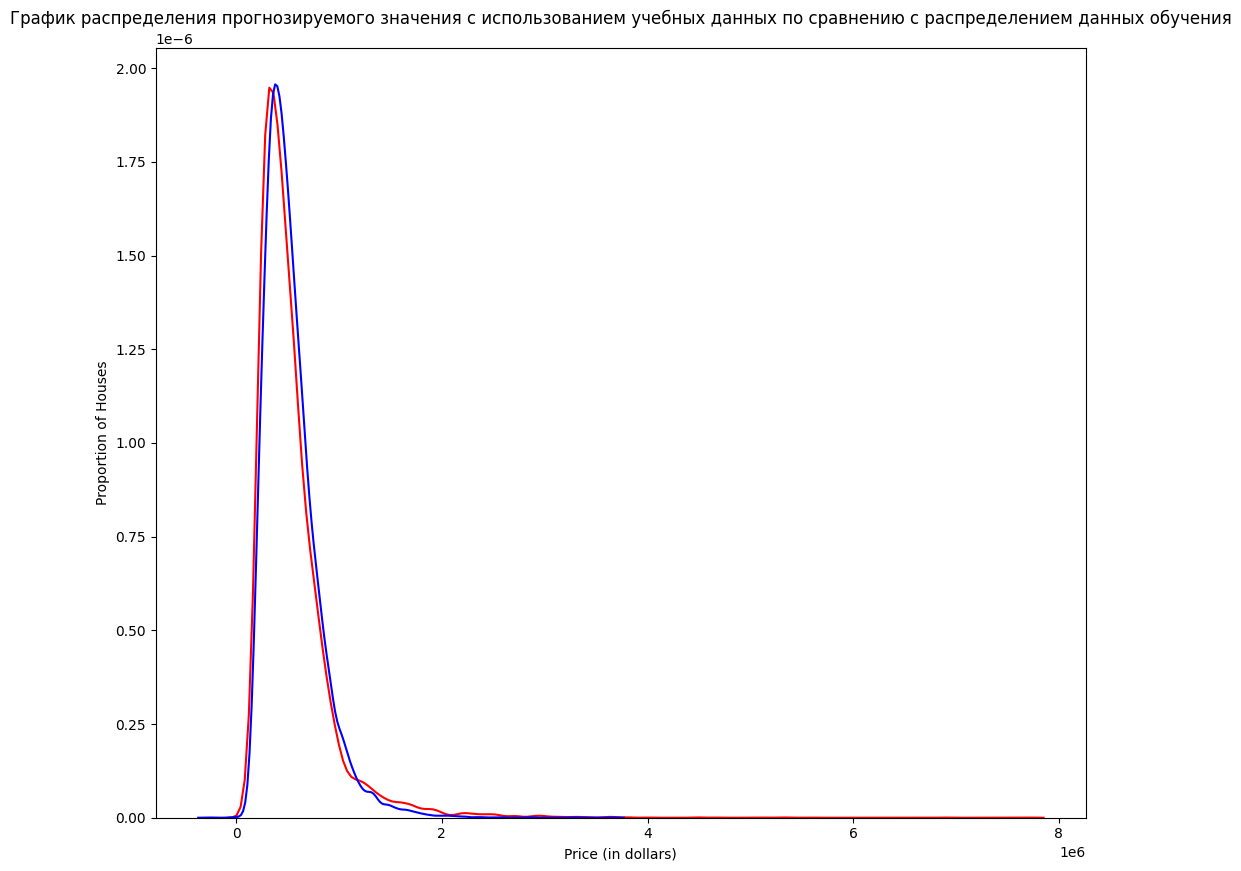

In [31]:
Title = 'График распределения прогнозируемого значения с использованием учебных данных по сравнению с распределением данных обучения'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

Рисунок 1: График прогнозируемых значений с использованием учебных данных по сравнению с фактическими значениями учебных данных.


До сих пор модель, кажется, преуспевает в обучении наборе данных обучения.Но что происходит, когда модель встречается с новыми данными из набора данных тестирования?
Когда модель генерирует новые значения из тестовых данных, мы видим, что распределение прогнозируемых значений сильно отличается от фактических целевых значений.елевых значений. 


C:\Users\admin\AppData\Local\Temp/ipykernel_2476/752177251.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
C:\Users\admin\AppData\Local\Temp/ipykernel_2476/752177251.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sns.di

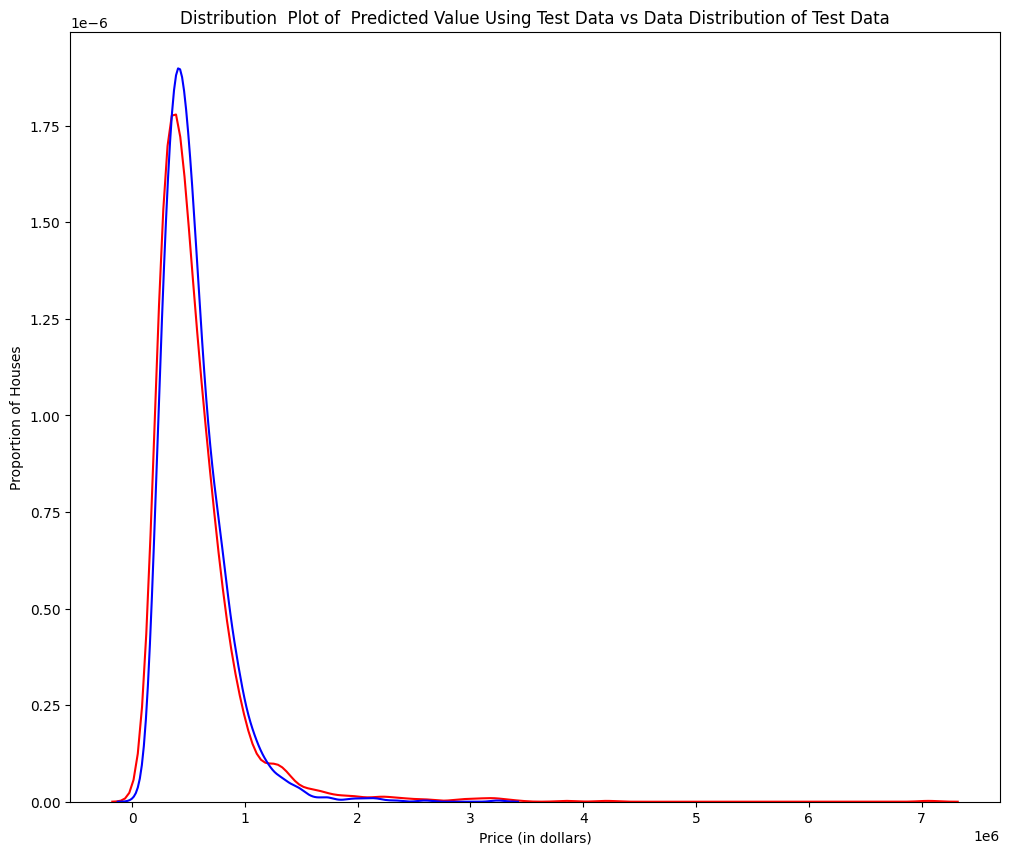

In [32]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

Рисунок 2: График прогнозируемого значения с использованием тестовых данных по сравнению со фактическими значениями тестовых данных.


<p> Сравнивая рисунок 1 и рисунок 2, очевидно, что распределение тестовых данных на рисунке 1 гораздо лучше приспосабливается к данным.Эта разница на рисунке 2 видно в диапазоне от 5000 до 15 000.Именно здесь форма распределения чрезвычайно отличается.Давайте посмотрим, если полиномиальная регрессия также демонстрирует падение точности прогнозирования при анализе тестового набора данных. </P>


In [33]:
from sklearn.preprocessing import PolynomialFeatures

<H4> переосмысление </h4>
<p> переосмысление происходит, когда модель подходит для шума, но не основной процесс.Следовательно, при тестировании вашей модели с использованием тестового набора ваша модель не работает так же хорошо, поскольку она моделирует шум, а не основной процесс, который генерировал отношения.

Давайте создадим полиномиальную модель степени 5. </P>


Давайте использовать 55 процентов данных для обучения, а остальное для тестирования:


In [34]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

We will perform a degree 5 polynomial transformation on the feature <b>'horsepower'</b>. 


In [35]:
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['sqft_living']])
x_test_pr = pr.fit_transform(x_test[['sqft_living']])
pr

PolynomialFeatures(degree=5)

Now, let's create a Linear Regression model "poly" and train it.


In [36]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression()

We can see the output of our model using the method "predict." We assign the values to "yhat".


In [37]:
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([ 379585.95155798, 1407637.4370913 ,  381074.34995099,
        339756.74991725,  799497.2049187 ])

Let's take the first five predicted values and compare it to the actual targets. 


In [38]:
print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [ 379585.95155798 1407637.4370913   381074.34995099  339756.74991725]
True values: [ 297000. 1578000.  562100.  631500.]


We will use the function "PollyPlot" that we defined at the beginning of the lab to display the training data, testing data, and the predicted function.


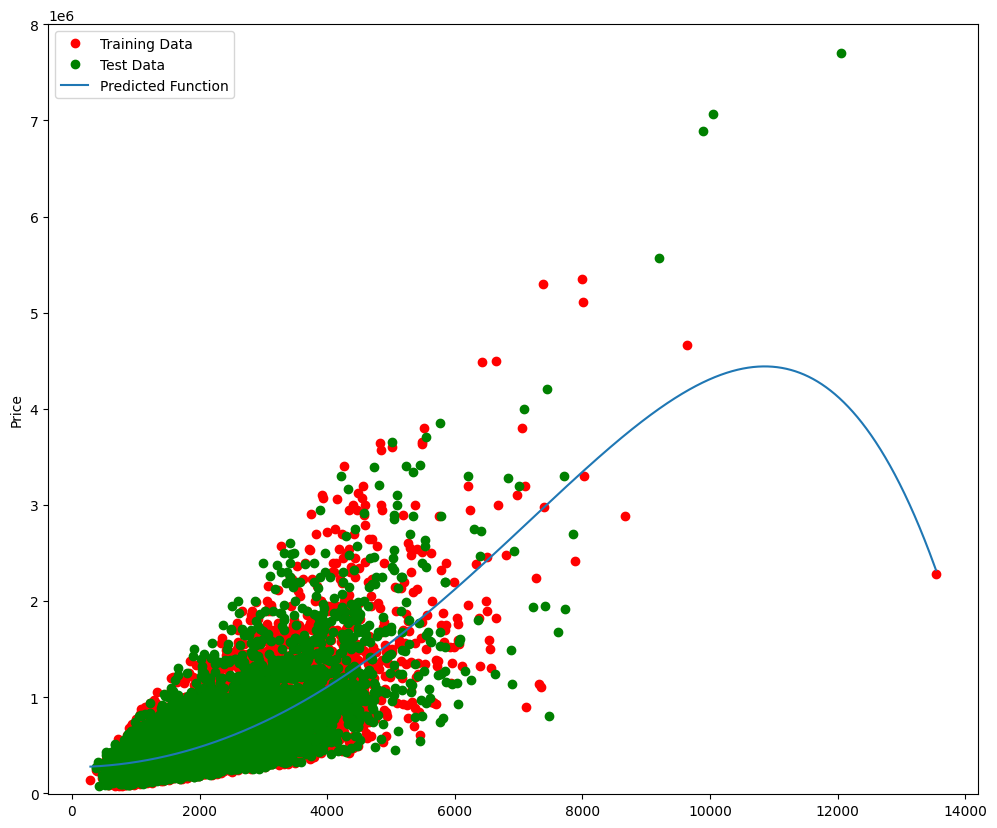

In [39]:
PollyPlot(x_train[['sqft_living']], x_test[['sqft_living']], y_train, y_test, poly,pr)

Figure 3: A polynomial regression model where red dots represent training data, green dots represent test data, and the blue line represents the model prediction. 


We see that the estimated function appears to track the data but around 200 horsepower, the function begins to diverge from the data points. 


 R^2 of the training data:


In [40]:
poly.score(x_train_pr, y_train)

0.5321847634391019

 R^2 of the test data:


In [41]:
poly.score(x_test_pr, y_test)

0.5491451245488983

We see the R^2 for the training data is 0.5567 while the R^2 on the test data was -29.87.  The lower the R^2, the worse the model. A negative R^2 is a sign of overfitting.


Let's see how the R^2 changes on the test data for different order polynomials and then plot the results:


Text(3, 0.75, 'Maximum R^2 ')

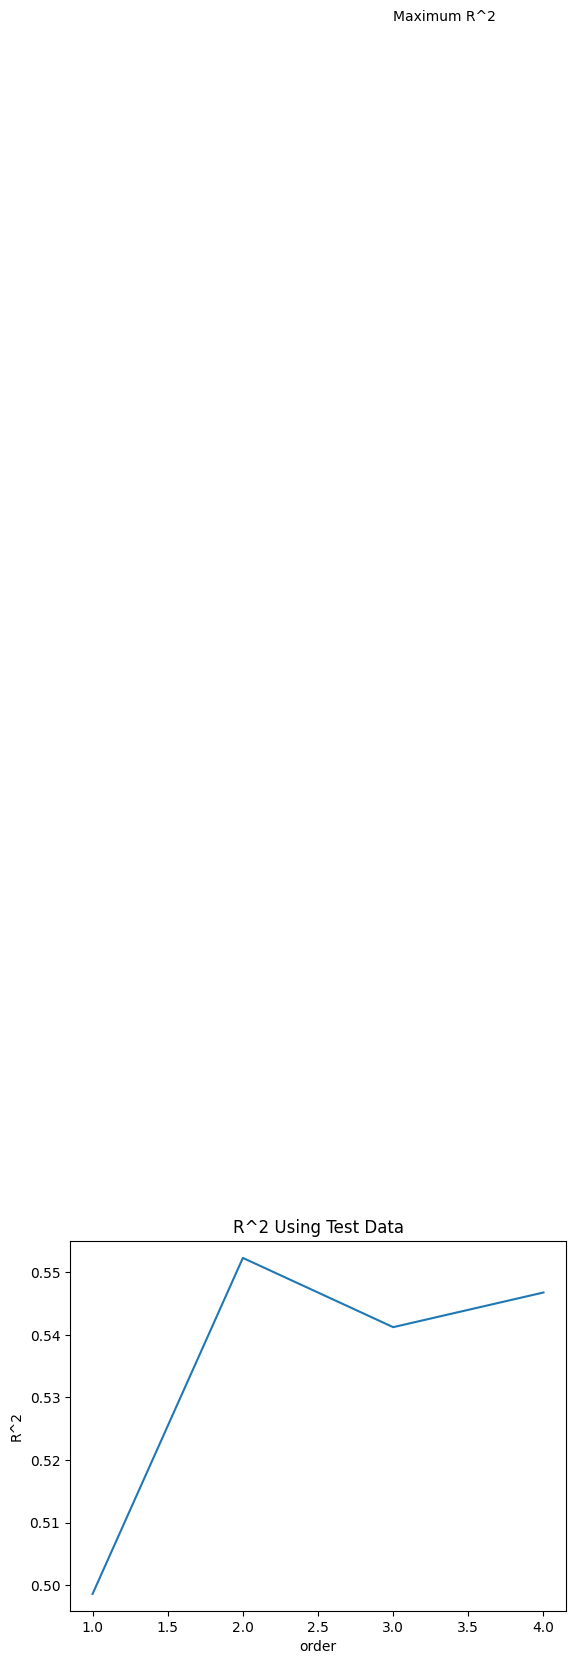

In [42]:
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['sqft_living']])
    
    x_test_pr = pr.fit_transform(x_test[['sqft_living']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')    

Мы видим, что R^2 постепенно увеличивается до тех пор, пока не будет использована третья степень полинома.Затем R^2 резко уменьшается .


Следующая функция будет использоваться в следующем разделе.Пожалуйста, запустите ячейку ниже.


In [43]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['sqft_living']])
    x_test_pr = pr.fit_transform(x_test[['sqft_living']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train[['sqft_living']], x_test[['sqft_living']], y_train,y_test, poly, pr)

Следующий интерфейс позволяет экспериментировать с различными полиномиальными порядками и различными количествами данных.

In [44]:
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #4a):</h1>
<b> мы можем выполнить полиномиальные преобразования с более чем одной функцией.Создайте объект «полиномиальные характеристики» объекта «PR1» второй степени.</b>
</div>


In [45]:
pr1=PolynomialFeatures(degree=2) 


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #4b): </h1>

<b> 
 Transform the training and testing samples for the features 'horsepower', 'curb-weight', 'engine-size' and 'highway-mpg'. Hint: use the method "fit_transform".</b>
</div>


In [46]:
x_train_pr1=pr1.fit_transform(x_train[['sqft_living', 'sqft_above', 'waterfront', 'bathrooms']])

x_test_pr1=pr1.fit_transform(x_test[['sqft_living', 'sqft_above', 'waterfront', 'bathrooms']])


<!-- The answer is below:

x_train_pr1=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
x_test_pr1=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

-->


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #4c): </h1>
<b> 
How many dimensions does the new feature have? Hint: use the attribute "shape".
</b>
</div>


In [47]:
x_train_pr1.shape


(11887, 15)

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #4d): </h1>

<b> 
Create a linear regression model "poly1". Train the object using the method "fit" using the polynomial features.</b>
</div>


In [48]:
poly1=LinearRegression().fit(x_train_pr1,y_train)


 <div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #4e): </h1>
<b>Use the method  "predict" to predict an output on the polynomial features, then use the function "DistributionPlot" to display the distribution of the predicted test output vs. the actual test data.</b>
</div>


C:\Users\admin\AppData\Local\Temp/ipykernel_2476/752177251.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
C:\Users\admin\AppData\Local\Temp/ipykernel_2476/752177251.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sns.di

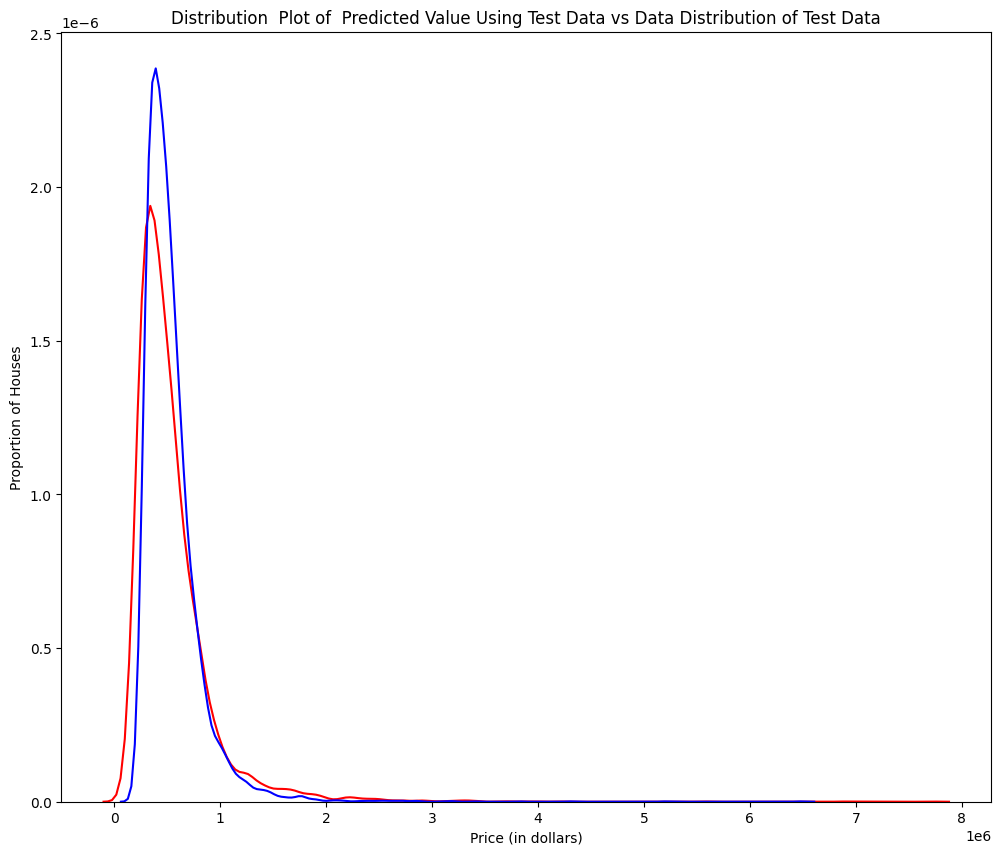

In [49]:
yhat_test1=poly1.predict(x_test_pr1)

Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'

DistributionPlot(y_test, yhat_test1, "Actual Values (Test)", "Predicted Values (Test)", Title)


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #4f): </h1>

<b>Using the distribution plot above, describe (in words) the two regions where the predicted prices are less accurate than the actual prices.</b>
</div>


In [50]:

#The predicted value is higher than actual value for cars where the price $10,000 range, conversely the predicted price is lower than the price cost in the $30,000 to $40,000 range. As such the model is not as accurate in these ranges.

<h2 id="ref3">Part 3: Ridge Regression</h2> 


 In this section, we will review Ridge Regression and see how the parameter alpha changes the model. Just a note, here our test data will be used as validation data.


 Let's perform a degree two polynomial transformation on our data. 


In [51]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['sqft_living', 'sqft_above', 'waterfront', 'bathrooms', 'waterfront','view','sqft_lot','sqft_basement']])
x_test_pr=pr.fit_transform(x_test[['sqft_living', 'sqft_above', 'waterfront', 'bathrooms', 'waterfront','view','sqft_lot','sqft_basement']])

 Let's import  <b>Ridge</b>  from the module <b>linear models</b>.


In [52]:
from sklearn.linear_model import Ridge

Let's create a Ridge regression object, setting the regularization parameter (alpha) to 0.1 


In [53]:
RigeModel=Ridge(alpha=1)

Like regular regression, you can fit the model using the method <b>fit</b>.


In [54]:
RigeModel.fit(x_train_pr, y_train)

Ridge(alpha=1)

 Similarly, you can obtain a prediction: 


In [55]:
yhat = RigeModel.predict(x_test_pr)

Let's compare the first five predicted samples to our test set: 


In [56]:
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

predicted: [ 364675.51414058 1198063.02485907  405041.5177455   324965.64738047]
test set : [ 297000. 1578000.  562100.  631500.]


We select the value of alpha that minimizes the test error. To do so, we can use a for loop. We have also created a progress bar to see how many iterations we have completed so far.


In [57]:
from tqdm import tqdm

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)
    
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

  0%|          | 0/1000 [00:00<?, ?it/s, Test Score=0.611, Train Score=0.611]

  1%|          | 7/1000 [00:00<00:32, 30.84it/s, Test Score=0.611, Train Score=0.611]c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.61522e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
  1%|          | 7/1000 [00:00<00:32, 30.84it/s, Test Score=0.611, Train Score=0.611]c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.17399e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
  1%|          | 7/1000 [00:00<00:32, 30.84it/s, Test Score=0.611, Train Score=0.611]c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.83655e-24): result may not be accurate.
  return linalg.solve(A, Xy

We can plot out the value of R^2 for different alphas: 


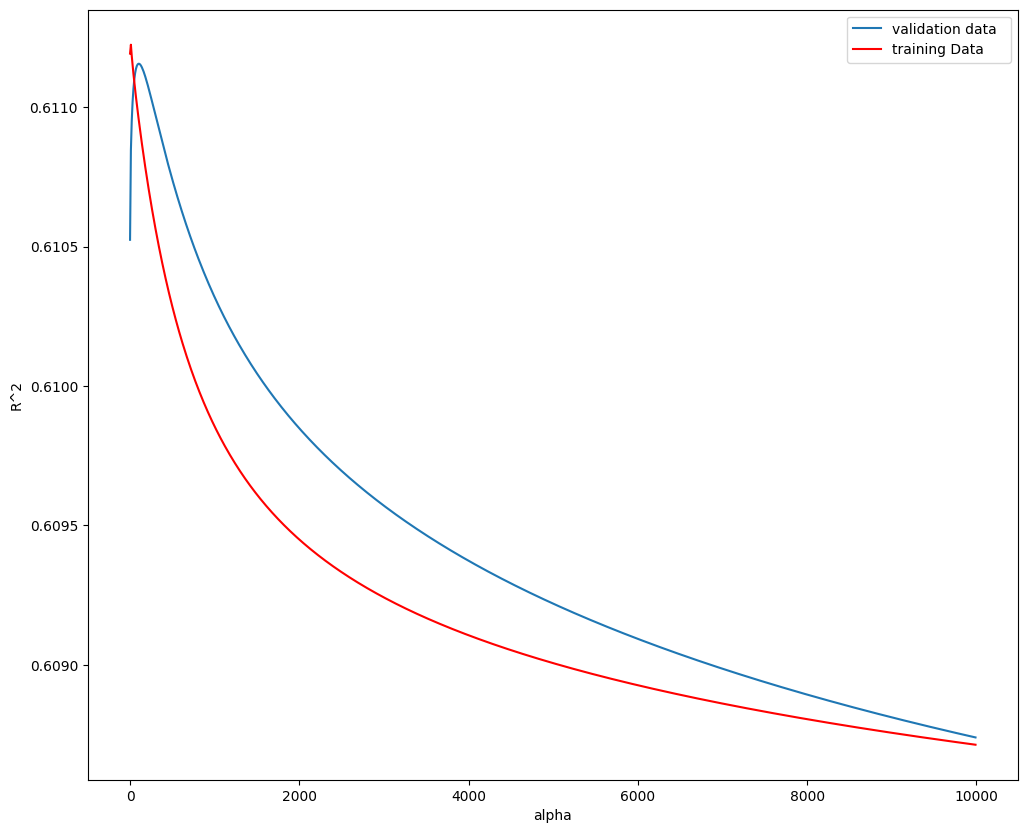

In [58]:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

**Figure 4**: The blue line represents the R^2 of the validation data, and the red line represents the R^2 of the training data. The x-axis represents the different values of Alpha. 


Здесь модель создана и протестирована на одних и тех же данных, поэтому данные обучения и тестирования одинаковы.

Красная линия на рисунке 4 представляет r^2 учебных данных.Как альфа увеличивает, R^2 уменьшается.Следовательно, по мере увеличения альфа модель хуже при учебных данных

Синяя линия представляет r^2 в данных проверки.По мере увеличения значения для альфа R^2 увеличивается и сходится в точке.

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #5): </h1>

Выполнить регрессию хребта.Рассчитайте R^2, используя полиномиальные функции, используйте учебные данные для обучения модели и используйте тестовые данные для проверки модели.Альфа -параметр должен быть установлен на 10.
</div>


In [59]:
RigeModel = Ridge(alpha=10) 
RigeModel.fit(x_train_pr, y_train)
RigeModel.score(x_test_pr, y_test)


0.6108455912542862

<h2 id="ref4">Part 4: Grid Search</h2>


Термин Альфа - это гиперпараметр.У Sklearn есть класс <b> gridsearchcv </b>, чтобы упростить процесс поиска лучшего гиперпараметра.


Let's import <b>GridSearchCV</b> from  the module <b>model_selection</b>.


In [60]:
from sklearn.model_selection import GridSearchCV

We create a dictionary of parameter values:


In [61]:
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

Create a Ridge regression object:


In [62]:
RR=Ridge()
RR

Ridge()

Create a ridge grid search object:


In [63]:
Grid1 = GridSearchCV(RR, parameters1,cv=4)

In order to avoid a deprecation warning due to the iid parameter, we set the value of iid to "None".

Fit the model:


In [64]:
Grid1.fit(x_data[['sqft_living', 'sqft_above', 'waterfront', 'bathrooms', 'waterfront','view','sqft_lot','sqft_basement']], y_data)

c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.80969e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.66828e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.4033e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.40785e-17): result may not be accurate.
  return linalg.solve(

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

The object finds the best parameter values on the validation data. We can obtain the estimator with the best parameters and assign it to the variable BestRR as follows:


In [65]:
BestRR=Grid1.best_estimator_
print(BestRR)

Ridge(alpha=10)


 We now test our model on the test data:


In [66]:
BestRR.score(x_test[['sqft_living', 'sqft_above', 'waterfront', 'bathrooms', 'waterfront','view','sqft_lot','sqft_basement']], y_test)

0.5477231993276884

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #6): </h1>
Perform a grid search for the alpha parameter and the normalization parameter, then find the best values of the parameters:
</div>


In [67]:
# Write your code below and press Shift+Enter to execute 
parameters2= [{'alpha': [0.001,0.1,1, 10, 100, 1000,10000,100000,100000]}]
Grid2 = GridSearchCV(Ridge(), parameters2, cv=4)
Grid2.fit(x_data[['sqft_living', 'sqft_above', 'waterfront', 'bathrooms', 'view', 'sqft_basement']],y_data)
Grid2.best_estimator_



Ridge(alpha=1)